In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib import style
style.use('dark_background')

In [11]:
df = pd.read_csv('bitcoinfinal.csv', header=None)
df.columns = ['Month','Price']
# df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df = df.set_index('Month')
df

,Price
Month,
0,217.4
1,255.7
2,244.3
3,236.1
4,228.7
5,262.9
6,284.5
7,231.4
8,236.5


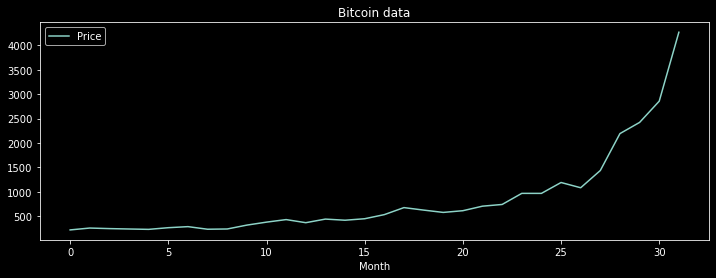

In [12]:
df.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Bitcoin data')
plt.show(block=False)

In [16]:
train_len = 29
train = df[0:train_len]
test = df[train_len:]

In [17]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Price'][train_len-1]

In [18]:
y_hat_naive

,Price,naive_forecast
Month,,
29,2420.7,2191.8
30,2856.0,2191.8
31,4268.8,2191.8


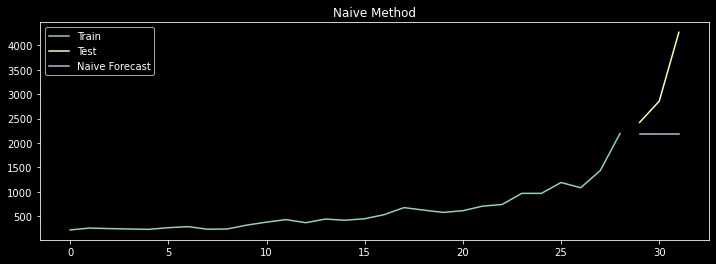

In [19]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label = 'Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(y_hat_naive['naive_forecast'], label = 'Naive Forecast')
plt.legend(loc='best') #to set legend in right place
plt.title('Naive Method')
plt.show()

In [20]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Price'].mean()

In [21]:
y_hat_avg

,Price,avg_forecast
Month,,
29,2420.7,595.751724
30,2856.0,595.751724
31,4268.8,595.751724


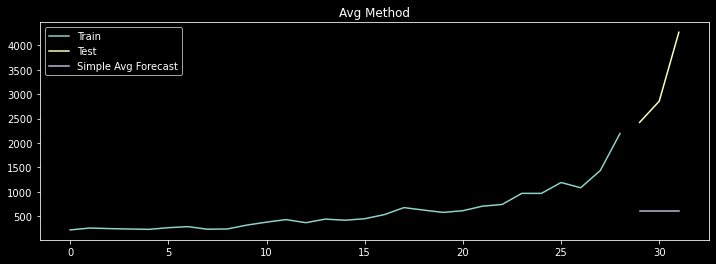

In [22]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label = 'Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(y_hat_avg['avg_forecast'], label = 'Simple Avg Forecast')
plt.legend(loc='best') #to set legend in right place
plt.title('Avg Method')
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price'] - y_hat_naive['naive_forecast'])/test['Price'])*100,2)
#Mape is in percentage
results = pd.DataFrame({'Method' : ['Naive method'], 'MAPE' : [mape], 'RMSE': [rmse]})
results = results[['Method', 'MAPE', 'RMSE']]
results
#Mape 23.63 implies model is 76.37% accurate

,Method,MAPE,RMSE
0,Naive method,27.12,1265.9


In [24]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price'] - y_hat_avg['avg_forecast'])/test['Price'])*100,2)
tempResults = pd.DataFrame({'Method' : ['Simple avg method'], 'MAPE' : [mape], 'RMSE': [rmse]})
results = pd.concat([results,tempResults])
results

,Method,MAPE,RMSE
0,Naive method,27.12,1265.90
0,Simple avg method,80.19,2703.73


In [25]:
y_hat_sma = df.copy()

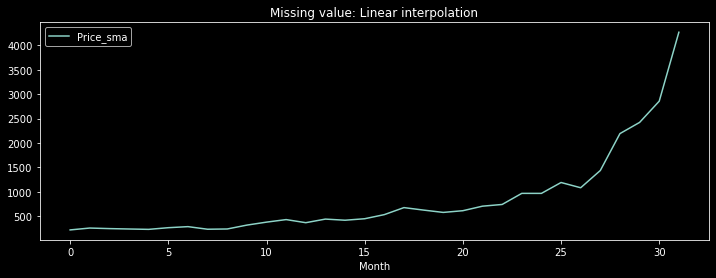

In [26]:
#handling null values
y_hat_sma = y_hat_sma.assign(Price_sma = y_hat_sma.Price.interpolate(method='linear'))
y_hat_sma[['Price_sma']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Missing value: Linear interpolation')
plt.show(block=False)

In [27]:
y_hat_sma['Price'] = y_hat_sma['Price_sma']

In [28]:
ma_window = 12
y_hat_sma['sma_forecast'] = y_hat_sma['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

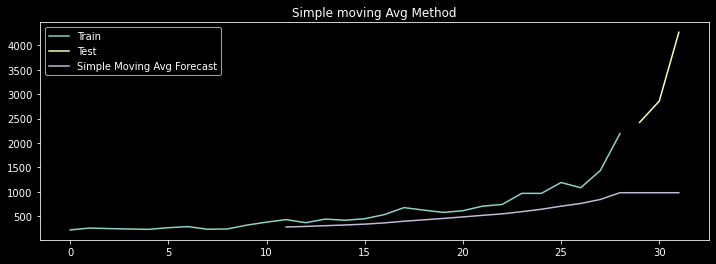

In [29]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label = 'Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(y_hat_sma['sma_forecast'], label = 'Simple Moving Avg Forecast')
plt.legend(loc='best') #to set legend in right place
plt.title('Simple moving Avg Method')
plt.show()

In [30]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price'] - y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100,2)
tempResults = pd.DataFrame({'Method' : ['SMA method12'], 'MAPE' : [mape], 'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results

,Method,MAPE,RMSE
0,Naive method,27.12,1265.90
0,Simple avg method,80.19,2703.73
0,SMA method12,67.42,2338.94


In [31]:
ma_window = 6
y_hat_sma['sma_forecast'] = y_hat_sma['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

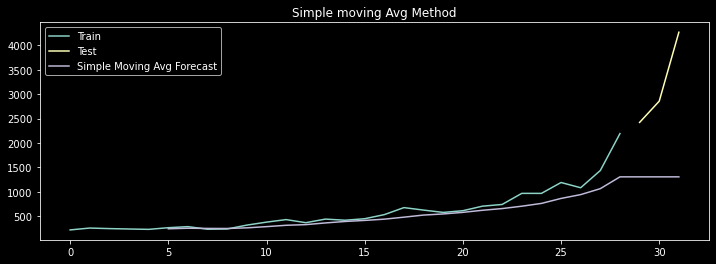

In [32]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label = 'Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(y_hat_sma['sma_forecast'], label = 'Simple Moving Avg Forecast')
plt.legend(loc='best') #to set legend in right place
plt.title('Simple moving Avg Method')
plt.show()

In [33]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price'] - y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100,2)
tempResults = pd.DataFrame({'Method' : ['SMA method6'], 'MAPE' : [mape], 'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results

,Method,MAPE,RMSE
0,Naive method,27.12,1265.90
0,Simple avg method,80.19,2703.73
0,SMA method12,67.42,2338.94
0,SMA method6,56.61,2035.79


In [34]:
ma_window = 3
y_hat_sma['sma_forecast'] = y_hat_sma['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

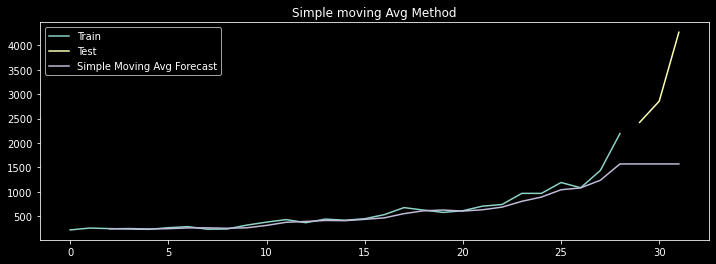

In [35]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label = 'Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(y_hat_sma['sma_forecast'], label = 'Simple Moving Avg Forecast')
plt.legend(loc='best') #to set legend in right place
plt.title('Simple moving Avg Method')
plt.show()

In [36]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price'] - y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100,2)
tempResults = pd.DataFrame({'Method' : ['SMA method3'], 'MAPE' : [mape], 'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results

,Method,MAPE,RMSE
0,Naive method,27.12,1265.90
0,Simple avg method,80.19,2703.73
0,SMA method12,67.42,2338.94
0,SMA method6,56.61,2035.79
0,SMA method3,47.81,1794.92


In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as es
model = es(np.asarray(train['Price']), seasonal_periods=12, trend='add', seasonal='add') 
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa = test.copy()
y_hat_hwa['hwa_forecast'] = model_fit.forecast(3)

{'smoothing_level': 0.624966890022127, 'smoothing_trend': 0.5961528558143976, 'smoothing_seasonal': 0.3597647701994941, 'damping_trend': nan, 'initial_level': 479.17621055887906, 'initial_trend': 26.550579768486735, 'initial_seasons': array([-293.26094352, -319.00562558, -348.9140801 , -259.7541799 ,
       -207.92324728, -217.18272732, -229.7957364 , -280.40111861,
       -274.82022844, -212.1203594 , -169.31385224, -101.68575335]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


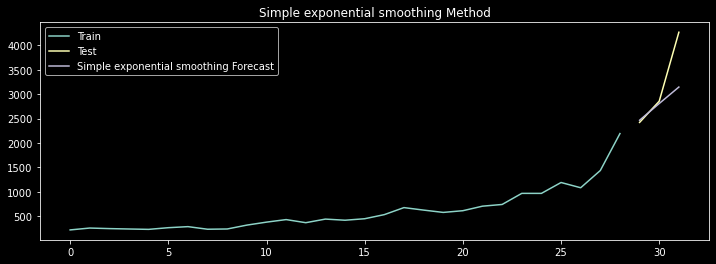

In [46]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label = 'Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(y_hat_hwa['hwa_forecast'], label = 'Simple exponential smoothing Forecast')
plt.legend(loc='best') #to set legend in right place
plt.title('Simple exponential smoothing Method')
plt.show()

In [47]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_hwa['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price'] - y_hat_hwa['hwa_forecast'])/test['Price'])*100,2)
tempResults = pd.DataFrame({'Method' : ['HOLT winters add'], 'MAPE' : [mape], 'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results

,Method,MAPE,RMSE
0,Naive method,27.12,1265.90
0,Simple avg method,80.19,2703.73
0,SMA method12,67.42,2338.94
0,SMA method6,56.61,2035.79
0,SMA method3,47.81,1794.92
0,HOLT winters add,9.94,649.70
0,HOLT winters add,13.16,455.89
0,HOLT winters add,9.94,649.70


In [48]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as es
model = es(np.asarray(train['Price']), seasonal_periods=3, trend='add', seasonal='add') 
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa = test.copy()
y_hat_hwa['hwa_forecast'] = model_fit.forecast(3)

{'smoothing_level': 0.9950625602861715, 'smoothing_trend': 0.4211195329179999, 'smoothing_seasonal': 9.75132400285262e-05, 'damping_trend': nan, 'initial_level': 559.4825908918455, 'initial_trend': 1.1393614060443729, 'initial_seasons': array([-340.0522103 , -301.79365662, -319.39222644]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [49]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_hwa['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price'] - y_hat_hwa['hwa_forecast'])/test['Price'])*100,2)
tempResults = pd.DataFrame({'Method' : ['HOLT winters add3'], 'MAPE' : [mape], 'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results

,Method,MAPE,RMSE
0,Naive method,27.12,1265.90
0,Simple avg method,80.19,2703.73
0,SMA method12,67.42,2338.94
0,SMA method6,56.61,2035.79
0,SMA method3,47.81,1794.92
0,HOLT winters add,9.94,649.70
0,HOLT winters add,13.16,455.89
0,HOLT winters add,9.94,649.70
0,HOLT winters add3,10.11,512.23


In [50]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as es
model = es(np.asarray(train['Price']), seasonal_periods=3, trend='add', seasonal='mul') 
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm = test.copy()
y_hat_hwm['hwm_forecast'] = model_fit.forecast(3)

{'smoothing_level': 0.9959995506867326, 'smoothing_trend': 0.35161426970096366, 'smoothing_seasonal': 6.134075119543175e-05, 'damping_trend': nan, 'initial_level': 528.7886842895795, 'initial_trend': -13.291655344245319, 'initial_seasons': array([0.4239661 , 0.48586882, 0.43986055]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [51]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_hwm['hwm_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price'] - y_hat_hwm['hwm_forecast'])/test['Price'])*100,2)
tempResults = pd.DataFrame({'Method' : ['HOLT winters mul3'], 'MAPE' : [mape], 'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results

,Method,MAPE,RMSE
0,Naive method,27.12,1265.90
0,Simple avg method,80.19,2703.73
0,SMA method12,67.42,2338.94
0,SMA method6,56.61,2035.79
0,SMA method3,47.81,1794.92
0,HOLT winters add,9.94,649.70
0,HOLT winters add,13.16,455.89
0,HOLT winters add,9.94,649.70
0,HOLT winters add3,10.11,512.23
0,HOLT winters mul3,15.26,687.91
